In [2]:
from tensorflow.keras.datasets import mnist
((trn_images, trn_labels), 
 (tst_images, tst_labels))=  mnist.load_data()

In [33]:
trn_images.nbytes

47040000

In [7]:
trn_labels[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
trn_labels[-10:]

array([9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

In [12]:
trn_images.ndim,trn_images.shape

(3, (60000, 28, 28))

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    keras.Input(28*28), # 28*28 == 784
    layers.Dense(100, 
                 activation="relu"),
    layers.Dense(10,
                 activation="softmax")
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(f'00{model.layers[0].weights[0].shape}')
print(f'01{model.layers[0].weights[1].shape}')
print(f'10{model.layers[1].weights[0].shape}')
print(f'11{model.layers[1].weights[1].shape}') 

00(784, 100)
01(100,)
10(100, 10)
11(10,)


In [41]:
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

# before model.fit()

In [42]:
tst_images= tst_images.reshape((-1, 28*28))

result= model.evaluate(
    tst_images[0:1000], 
    tst_labels[0:1000]
)

32/32 [==============================] - 0s 2ms/step - loss: 183.0529 - accuracy: 0.0920


In [34]:
trn_images= trn_images.reshape((-1, 28*28))

In [43]:
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

model.fit(trn_images, 
          trn_labels, 
          epochs= 2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2288 - accuracy: 0.8544
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5882 - accuracy: 0.9211


# 1.9 after model.fit()

In [44]:
tst_images= tst_images.reshape((-1, 28*28))

result= model.evaluate(
    tst_images[0:1000], 
    tst_labels[0:1000]
)

32/32 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.9200


In [45]:
0.92-0.092

0.8280000000000001

# 1.10 10 epochs

In [46]:
model.fit(trn_images, 
          trn_labels, 
          epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4932 - accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4497 - accuracy: 0.9438
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4312 - accuracy: 0.9488
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.9535
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3818 - accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3587 - accuracy: 0.9604
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.9626
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3300 - accuracy: 0.9631
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.335

In [47]:
result= model.evaluate(
    tst_images[0:1000], 
    tst_labels[0:1000]
)

32/32 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.9510


# 2

In [5]:
import numpy as np
a=[]
for i in range(2*2*3*3):
    a.append(i)
a=np.array(a)
a.reshape(3,2,2,3)

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]],


       [[[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]],


       [[[24, 25, 26],
         [27, 28, 29]],

        [[30, 31, 32],
         [33, 34, 35]]]])

In [36]:
import tensorflow as tf
aTensor = tf.constant(a)
bTensor =tf.constant(a)

In [37]:
aTensor=tf.reshape(aTensor, [3,2,2,3])
bTensor=tf.reshape(bTensor, [3,2,2,3])

In [19]:
aTensor

<tf.Tensor: shape=(3, 2, 2, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]],


       [[[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]],


       [[[24, 25, 26],
         [27, 28, 29]],

        [[30, 31, 32],
         [33, 34, 35]]]])>

In [18]:
aTensor[0,0,:,:]

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]])>

In [20]:
aTensor[0,0,:,:] * aTensor[0,0,:,:]

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 0,  1,  4],
       [ 9, 16, 25]])>

In [31]:
aTensor[0,0,:,:] @ bTensor[0,0,:,:]

InvalidArgumentError: Matrix size-incompatible: In[0]: [2,3], In[1]: [2,3] [Op:MatMul]

In [22]:
aTensor * aTensor 

<tf.Tensor: shape=(3, 2, 2, 3), dtype=int32, numpy=
array([[[[   0,    1,    4],
         [   9,   16,   25]],

        [[  36,   49,   64],
         [  81,  100,  121]]],


       [[[ 144,  169,  196],
         [ 225,  256,  289]],

        [[ 324,  361,  400],
         [ 441,  484,  529]]],


       [[[ 576,  625,  676],
         [ 729,  784,  841]],

        [[ 900,  961, 1024],
         [1089, 1156, 1225]]]])>

In [23]:
aTensor @ aTensor

InvalidArgumentError: Matrix size-incompatible: In[0]: [3,2,2,3], In[1]: [3,2,2,3] [Op:BatchMatMulV2]

In [35]:
bTensor=aTensor.T

AttributeError: 
        'EagerTensor' object has no attribute 'T'.
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()

In [32]:
bTensor

<tf.Tensor: shape=(3, 2, 2, 3), dtype=int32, numpy=
array([[[[ 0, 12, 24],
         [ 6, 18, 30]],

        [[ 3, 15, 27],
         [ 9, 21, 33]]],


       [[[ 1, 13, 25],
         [ 7, 19, 31]],

        [[ 4, 16, 28],
         [10, 22, 34]]],


       [[[ 2, 14, 26],
         [ 8, 20, 32]],

        [[ 5, 17, 29],
         [11, 23, 35]]]])>

# 3

In [3]:
trn_images= trn_images.reshape((-1, 28*28))
from tensorflow import keras
from tensorflow.keras import layers
x=  keras.Input(shape=(28*28,), name="x")

h1= layers.Dense(50, activation="relu",    name='h1')(x)
h2= layers.Dense(50, activation="sigmoid", name='h2')(x)
h12=layers.Concatenate(name='h12')([h1,h2])

h3= layers.Dense(50, activation="tanh",    name='h3')(h12)
y=  layers.Dense(10,  activation="softmax", name='y')(h3)

model= keras.Model(
    inputs=  x, 
    outputs= y)

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

model.fit(trn_images, 
          trn_labels, 
          epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6737 - accuracy: 0.7883
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3867 - accuracy: 0.8833
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3077 - accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9129
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9199
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2562 - accuracy: 0.9240
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2428 - accuracy: 0.9283
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2277 - accuracy: 0.9329
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.222

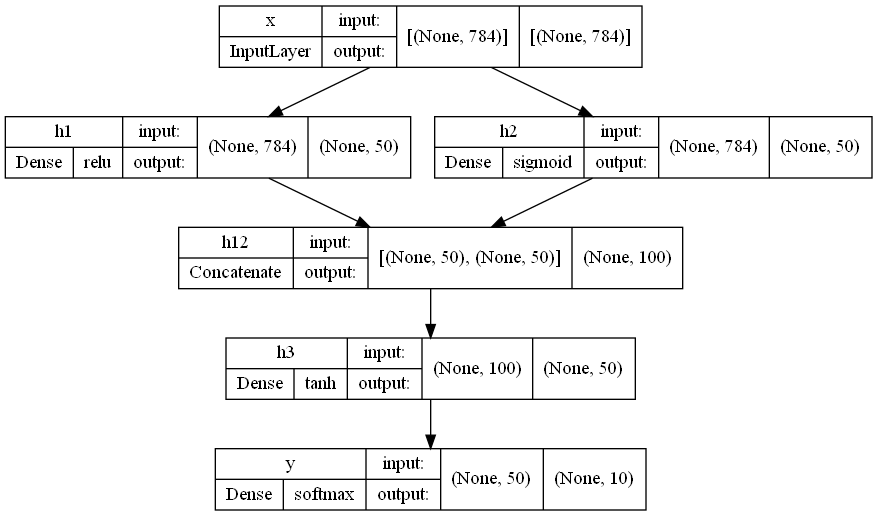

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
    show_shapes= True, 
    show_layer_activations= True)